In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [4]:
CARPETA_DATOS_LIMPIOS = 'Datos/Limpios/'
df= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion.csv'))
df_missings= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion_missings.csv'))

# Se entrenan los modelos con el df completo

In [3]:
df.head()

,growth_stage,Anos en Mercado,Cash flow mil EUR_2021,EBITDA mil EUR_2021,Inmovilizado mil EUR_2021,Fondos propios mil EUR_2021,Valor agregado mil EUR_2021,Total pasivo_ratio,Inmovilizado mil EUR_ratio,Capital social mil EUR,...,Gastos financieros mil EUR_ratio,Gastos de personal mil EUR_2021,Resultado financiero mil EUR_ratio,revenue_manufacturing,Total pasivo y capital propio mil EUR_2021,Total activo mil EUR_2021,Gastos financieros mil EUR_2021,Pasivo fijo mil EUR_2021,total_funding,Porcentaje_adquisicion_cat
0,2.0,32,3296.408000,3600.559000,8604.70000,12382.28400,6893.59300,1.439262,0.980366,745.330,...,1.526306,3302.98000,0.696217,1,1.950122e+04,1.950122e+04,100.03600,4198.31500,0.03,1
1,0.0,31,-35.104810,54.851080,137.24646,1242.34124,423.95067,0.600331,0.762976,291.485,...,43.385462,459.05548,-282.969141,0,1.793114e+03,1.793114e+03,90.16063,47.65796,0.07,1
2,1.0,38,3589.000000,6182.000000,150758.00000,146672.00000,105344.00000,1.163202,1.431985,2000.000,...,0.634522,98266.00000,-0.045835,0,1.183593e+06,1.183593e+06,3540.00000,216871.00000,0.00,2
3,2.0,20,-72.670569,-20.896349,2983.85415,1048.72675,1585.07324,1.635357,1.048763,158.970,...,1.723532,1584.17903,-0.993082,0,6.646021e+03,6.646021e+03,73.56478,1477.75274,0.56,1
4,2.0,18,3670.000000,9977.000000,143704.00000,167478.00000,12660.00000,0.947751,1.106232,13301.000,...,1.488876,7230.00000,1.617527,1,2.374040e+05,2.374040e+05,9971.00000,37827.00000,100.00,2


In [5]:
# se dividen los datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Porcentaje_adquisicion_cat']), df['Porcentaje_adquisicion_cat'], test_size=0.1, random_state=42)

# se vuelve a dividir el train en train y validation

X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# el primer modelo que se prueba es el automl de tpot

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_training, y_training)



c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                             
Generation 1 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 2 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 3 - Current best internal CV score: 0.5912994350282486
                                                                              
Generation 4 - Current best internal CV score: 0.6048587570621469
                                                                              
Generation 5 - Current best internal CV score: 0.6048587570621469
                                                                              
Best pipeline: RandomForestClassifier(MinMaxScaler(MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.01)), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_le

TPOTClassifier(generations=5, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# se prueba el modelo con los datos de test
prediccion = tpot.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

NameError: name 'tpot' is not defined

In [7]:
# se prueban modelos simples de sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# se entrenan los modelos
logreg = LogisticRegression()
logreg.fit(X_training, y_training)

rf = RandomForestClassifier()
rf.fit(X_training, y_training)

svc = SVC()
svc.fit(X_training, y_training)

knn = KNeighborsClassifier()
knn.fit(X_training, y_training)

dt = DecisionTreeClassifier()
dt.fit(X_training, y_training)

gnb = GaussianNB()
gnb.fit(X_training, y_training)

# se prueba el modelo con los datos de test
prediccion = logreg.predict(X_validation)
print('Regresion logistica: ', accuracy_score(y_validation, prediccion))

prediccion = rf.predict(X_validation)
print('Random forest: ', accuracy_score(y_validation, prediccion))

prediccion = svc.predict(X_validation)
print('SVC: ', accuracy_score(y_validation, prediccion))

prediccion = knn.predict(X_validation)
print('KNN: ', accuracy_score(y_validation, prediccion))

prediccion = dt.predict(X_validation)
print('Decision tree: ', accuracy_score(y_validation, prediccion))

prediccion = gnb.predict(X_validation)
print('GaussianNB: ', accuracy_score(y_validation, prediccion))


Regresion logistica:  0.5135135135135135
Random forest:  0.6081081081081081
SVC:  0.43243243243243246
KNN:  0.5540540540540541
Decision tree:  0.47297297297297297
GaussianNB:  0.5540540540540541


Los modelos que mejor funcionan son el random forest y el arbol de decision

## STACKING

Accuracy:  0.5945945945945946


Text(0.5, 25.722222222222214, 'Predicted')

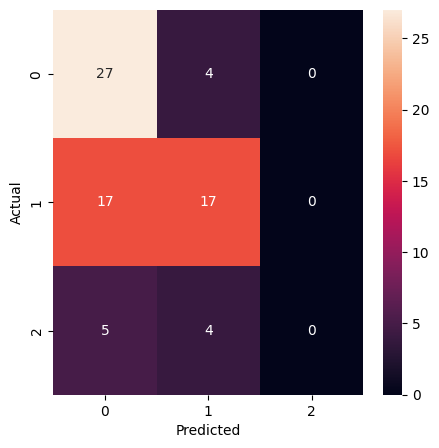

In [8]:
# se prueban algoritmos de stacking

from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=0)),
    ('log', LogisticRegression(max_iter=10000, random_state=0)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('gnb', GaussianNB())
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(random_state=0)
)
clf.fit(X_training, y_training)

prediccion = clf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy:  0.6351351351351351


Text(0.5, 25.722222222222214, 'Predicted')

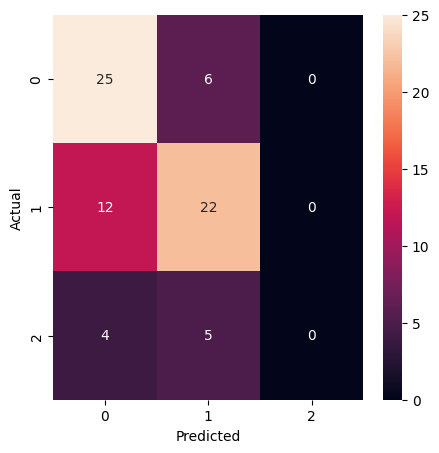

In [9]:
# bagging

from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0).fit(X_training, y_training)

prediccion = clf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [10]:
# se hace un grid search para encontrar los mejores parametros para el modelo

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_training, y_training)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
0.5913559322033899


Accuracy:  0.6486486486486487


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Text(0.5, 25.722222222222214, 'Predicted')

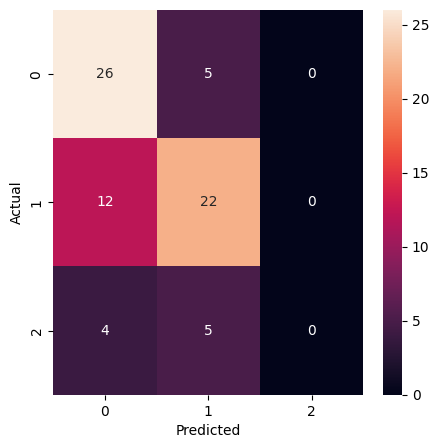

In [10]:
# se prueba el modelo con los hiperparametros encontrados

rf_mejorado = RandomForestClassifier(n_estimators=50, max_features='auto', max_depth=5, criterion='gini', random_state=0)
rf_mejorado.fit(X_training, y_training)

prediccion = rf_mejorado.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

El resultado mejora sustancialmente al cambiar los hiperparametros del random forest, mejorando el accuracy en 4 puntos porcentuales

In [12]:
# bayesion optimization

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators': Integer(10, 500),
        'max_features': Categorical(['auto', 'sqrt', 'log2']),
        'max_depth': Integer(4, 8),
        'criterion': Categorical(['gini', 'entropy'])
    },
    n_iter=32,
    cv=5,
    random_state=0,
    n_jobs=-1
)

opt.fit(X_training, y_training)

print(opt.best_params_)
print(opt.best_score_)
print(opt.best_estimator_)

OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('max_features', 'log2'), ('n_estimators', 28)])
0.5980790960451977
RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=28)


Accuracy:  0.6486486486486487


Text(0.5, 25.722222222222214, 'Predicted')

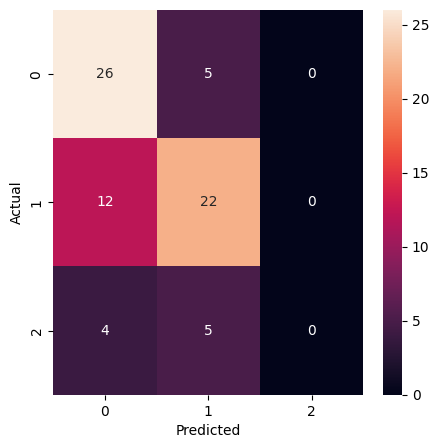

In [11]:
# se prueba este modelo con los hiperparametros encontrados

rf = RandomForestClassifier(n_estimators=499, max_features='sqrt', max_depth=4, criterion='gini', random_state=0)
rf.fit(X_training, y_training)

prediccion = rf.predict(X_validation)
print('Accuracy: ', accuracy_score(y_validation, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

En este caso empeora el accuracy

Accuracy:  0.6351351351351351


Text(0.5, 25.722222222222214, 'Predicted')

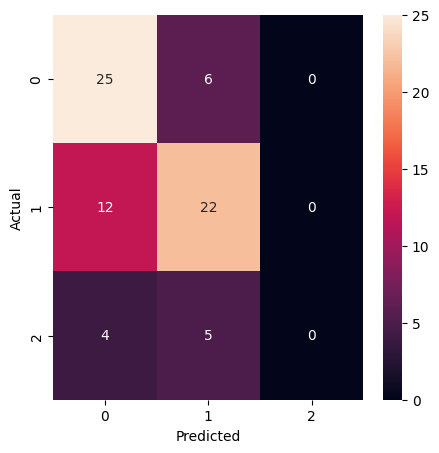

In [12]:
# obtener la matriz de probabilidades de clase
proba = clf.predict_proba(X_validation)

# establecer el umbral para la probabilidad de la clase 0
threshold = 0.7

# ajustar las predicciones en consecuencia
prediccion = [0 if p[0] >= threshold else p.argmax() for p in proba]

# calcular la precisión y trazar la matriz de confusión
print('Accuracy: ', accuracy_score(y_validation, prediccion))
cm = confusion_matrix(y_validation, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


Se ha conseguido mejorar ligéramente el score con el bagging

In [13]:
# se prueban modelos de boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# se entrenan los modelos
ada = AdaBoostClassifier()
ada.fit(X_training, y_training)

gbc = GradientBoostingClassifier()
gbc.fit(X_training, y_training)

xgb = XGBClassifier()
xgb.fit(X_training, y_training)

cbc = CatBoostClassifier()
cbc.fit(X_training, y_training)

# se prueba el modelo con los datos de test
prediccion = ada.predict(X_validation)
print('AdaBoost: ', accuracy_score(y_validation, prediccion))

prediccion = gbc.predict(X_validation)
print('GradientBoosting: ', accuracy_score(y_validation, prediccion))

prediccion = xgb.predict(X_validation)
print('XGBoost: ', accuracy_score(y_validation, prediccion))

prediccion = cbc.predict(X_validation)
print('CatBoost: ', accuracy_score(y_validation, prediccion))

Learning rate set to 0.074363
0:	learn: 1.0810123	total: 144ms	remaining: 2m 24s
1:	learn: 1.0642513	total: 148ms	remaining: 1m 13s
2:	learn: 1.0439577	total: 153ms	remaining: 50.9s
3:	learn: 1.0277785	total: 158ms	remaining: 39.4s
4:	learn: 1.0124058	total: 162ms	remaining: 32.2s
5:	learn: 0.9937871	total: 166ms	remaining: 27.5s
6:	learn: 0.9804615	total: 169ms	remaining: 24s
7:	learn: 0.9663322	total: 175ms	remaining: 21.7s
8:	learn: 0.9546382	total: 180ms	remaining: 19.8s
9:	learn: 0.9408259	total: 184ms	remaining: 18.2s
10:	learn: 0.9284700	total: 188ms	remaining: 16.9s
11:	learn: 0.9172815	total: 193ms	remaining: 15.9s
12:	learn: 0.9077482	total: 197ms	remaining: 14.9s
13:	learn: 0.8995291	total: 202ms	remaining: 14.2s
14:	learn: 0.8912639	total: 207ms	remaining: 13.6s
15:	learn: 0.8798505	total: 211ms	remaining: 13s
16:	learn: 0.8701905	total: 215ms	remaining: 12.4s
17:	learn: 0.8624041	total: 219ms	remaining: 11.9s
18:	learn: 0.8562593	total: 224ms	remaining: 11.6s
19:	learn: 0.

En este caso el catboost da el mismo resultado que el random forest y el XGBoost también da muy buenos resultados, mejores que el arbol de decision

# Modelos con df con missings

In [15]:
# se divide en train y test

X_train_missings, X_test_missings, y_train_missings, y_test_missings = train_test_split(df_missings.drop(columns=['Porcentaje_adquisicion_cat', 'Codigo_NIF', 'Nombre_sabi']), df_missings['Porcentaje_adquisicion_cat'], test_size=0.1, random_state=42)

# se vuelve a dividir el train en train y validation

X_training_missings, X_validation_missings, y_training_missings, y_validation_missings = train_test_split(X_train_missings, y_train_missings, test_size=0.2, random_state=42)

In [21]:
# el primer modelo que se prueba es el automl de tpot

tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_training_missings, y_training_missings)

                                                                             
Generation 1 - Current best internal CV score: 0.6012994350282487
                                                                              
Generation 2 - Current best internal CV score: 0.6012994350282487
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=3, max_features=0.2, min_samples_leaf=11, min_samples_split=18, n_estimators=100, subsample=0.15000000000000002)


TPOTClassifier(generations=2, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

Accuracy:  0.6351351351351351
Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            max_features=0.2,
                                            min_samples_leaf=11,
                                            min_samples_split=18,
                                            random_state=42,
                                            subsample=0.15000000000000002))])


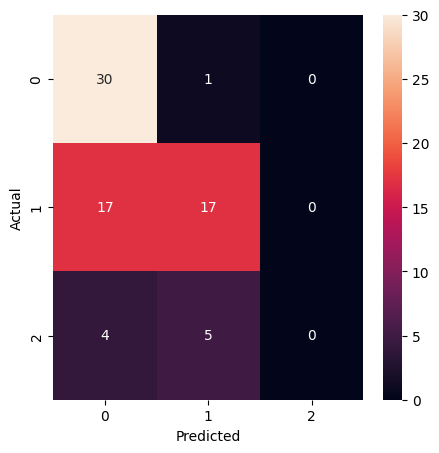

In [22]:
# se prueba el modelo con los datos de validacion
prediccion = tpot.predict(X_validation_missings)
print('Accuracy: ', accuracy_score(y_validation_missings, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_validation_missings, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# se obtienen los hiperparametros del mejor modelo
print(tpot.fitted_pipeline_)

In [17]:
# se prueban modelos de boosting

# se entrenan los modelos
ada_missing = AdaBoostClassifier()
ada_missing.fit(X_training_missings, y_training_missings)

gbc_missing = GradientBoostingClassifier(learning_rate=0.01,
                                            max_features=0.2,
                                            min_samples_leaf=11,
                                            min_samples_split=18,
                                            random_state=42,
                                            subsample=0.15000000000000002)
gbc_missing.fit(X_training_missings, y_training_missings)

xgb_missing = XGBClassifier()
xgb_missing.fit(X_training_missings, y_training_missings)

cbc_missing = CatBoostClassifier()
cbc_missing.fit(X_training_missings, y_training_missings)

# se prueba el modelo con los datos de test
prediccion = ada_missing.predict(X_validation_missings)
print('AdaBoost: ', accuracy_score(y_validation_missings, prediccion))

prediccion = gbc_missing.predict(X_validation_missings)
print('GradientBoosting: ', accuracy_score(y_validation_missings, prediccion))

prediccion = xgb_missing.predict(X_validation_missings)
print('XGBoost: ', accuracy_score(y_validation_missings, prediccion))

prediccion = cbc_missing.predict(X_validation_missings)
print('CatBoost: ', accuracy_score(y_validation_missings, prediccion))

Learning rate set to 0.074363
0:	learn: 1.0779801	total: 21.9ms	remaining: 21.9s
1:	learn: 1.0579497	total: 40.5ms	remaining: 20.2s
2:	learn: 1.0433610	total: 61.7ms	remaining: 20.5s
3:	learn: 1.0261371	total: 86ms	remaining: 21.4s
4:	learn: 1.0088632	total: 109ms	remaining: 21.6s
5:	learn: 0.9959522	total: 130ms	remaining: 21.5s
6:	learn: 0.9814249	total: 151ms	remaining: 21.5s
7:	learn: 0.9706932	total: 173ms	remaining: 21.4s
8:	learn: 0.9538140	total: 192ms	remaining: 21.1s
9:	learn: 0.9378941	total: 214ms	remaining: 21.2s
10:	learn: 0.9256040	total: 235ms	remaining: 21.1s
11:	learn: 0.9136794	total: 258ms	remaining: 21.2s
12:	learn: 0.9032815	total: 280ms	remaining: 21.2s
13:	learn: 0.8925641	total: 300ms	remaining: 21.1s
14:	learn: 0.8830767	total: 318ms	remaining: 20.9s
15:	learn: 0.8722944	total: 336ms	remaining: 20.6s
16:	learn: 0.8631849	total: 353ms	remaining: 20.4s
17:	learn: 0.8516943	total: 373ms	remaining: 20.3s
18:	learn: 0.8448322	total: 391ms	remaining: 20.2s
19:	learn

Se obtienen los mismos resultados que con el df completo

In [21]:
# se guardan los modelos que mejor resultado han dado
# se crea carpeta de modelos si no existe
if not os.path.exists('modelos'):
    os.makedirs('modelos')

# dentro de esa carpeta se crea otra carpeta para los modelos de clasificacion
if not os.path.exists('modelos/clasificacion'):
    os.makedirs('modelos/clasificacion')

# se guarda el modelo de gradient boosting en la carpeta de modelos
pickle.dump(gbc_missing, open('modelos/clasificacion/gbc_model.pkl', 'wb'))

# se guarda el modelo de random forest
pickle.dump(rf_mejorado, open('modelos/clasificacion/rfc_model.pkl', 'wb'))

# se guarda el modelo de catboost
pickle.dump(cbc, open('modelos/clasificacion/cbc_model.pkl', 'wb'))

# se guarda el modelo de regresion logistica
pickle.dump(logreg, open('modelos/clasificacion/lr_model.pkl', 'wb'))